In [3]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 23: Hypothesis Testing, Continued

Recall in Lesson 22, we covered hypothesis testing. The structure of a hypothesis test is largely similar regardless of the context of the problem. We state the hypotheses, decide on a test statistic, calculate the $p$-value and reach a conclusion. To calculate a $p$-value, we need to find the distribution of the test statistic under the null hypothesis. 

### Example 1: The Lady Tasting Tea

The "lady tasting tea" problem is a now famous story during which, at a gathering one summer afternoon in Cambridge, some friends drank tea with milk. Among them, a woman claimed to be able to tell, based on taste, whether the milk or the tea was added first to the cup. A now famous statistician, Ronald Fisher, was at the gathering, and he studied the claim. The woman was offered 8 cups of tea mixed with milk (4 with milk added first and 4 with tea added first) and she successfully identified 6 (3 of each). What can we say about her ability to discriminate the teas? 

Step 1: State the hypotheses

H0: The woman cannot discern which had milk added first or tea added first and her success is based on randomness

H1: The woman can discern which had milk added first or tea added first and her success may be based on skill

Step 2: Determine and calculate a test statistic

Because the problem represents a binomial distribution without replacement, we can model a test statistic after the hypergeometric distribution. 

In [26]:
M,n,N=8,4,4
stats.hypergeom.rvs(M,n,N,size=1)

array([2])

Step 3: Calculate a P-value.

We are interested in the probability that a random test results in a value greater than or equal to three cups identified of tea poured first. To that end, we will find the find the probability that less than or equal to two cups are successfully identified and subtract it from 1. 

In [27]:
1-stats.hypergeom.cdf(2,M,n,N)

0.24285714285714288

Step 4: Draw conclusions

Given our P-value of .243, we find that the result is insignificant at the 5% level and we fail to reject the null hypothesis. 

### Example 2: iris dataset

The `iris` dataset is common in introductory statistics. It shows various characteristics of three different species of irises. Let's determine whether the virginica species has a larger mean sepal width than that of versicolor. 

In [4]:
iris=Table().read_table("iris.csv")
iris.group(4,np.mean)

species,sepal_length mean,sepal_width mean,petal_length mean,petal_width mean
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.77,4.26,1.326
virginica,6.588,2.974,5.552,2.026


Step 1: State the hypothesis

H0: The versicolor and virginica species have no significant diferences in mean sepal width.

H1: The virginica species has a larger mean sepal width than that of veriscolor

Step 2: We will define our test statistic as the difference in sample mean between versicular and viginica sepal widths.

Step 3: ...

In [5]:
iris_sub=iris.select(4,1).where(0,are.not_containing('setosa'))
obs=np.diff(iris_sub.group(0,np.mean).column(1))[0]
print(obs)
iris_sub.show()

0.20399999999999974


species,sepal_width
versicolor,3.2
versicolor,3.2
versicolor,3.1
versicolor,2.3
versicolor,2.8
versicolor,2.8
versicolor,3.3
versicolor,2.4
versicolor,2.9
versicolor,2.7


[-0.02  -0.084 -0.108 ... -0.068  0.064 -0.02 ]


C:\Users\C20Joseph.Belina\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


0.0008

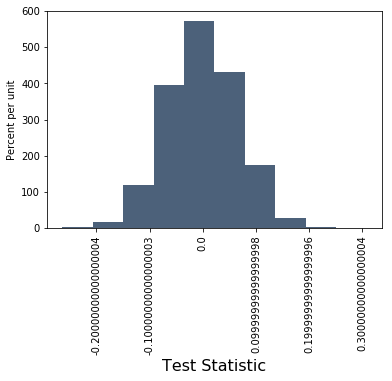

In [12]:
num_obs = iris_sub.num_rows
ts = []
for i in np.arange(10000):
    iris_sample = iris_sub.with_column('sampled',iris_sub.sample(num_obs,with_replacement=False).column(1))
    ts = np.append(ts,np.diff(iris_sample.group(0,np.mean).column(2))[0])
print(ts)
Table().with_column("Test Statistic",ts).hist(0)
p_value = (ts>=obs).sum()/10000
p_value

Step 4: Given our very small p-value of .0008 or .08%, we can safely reject the null hypothesis in favor of the alternate hypothesis that the virginica sepal width is larger than that of the versicolor. 